# ID3 Decision Tree Classifier

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [255]:
import pandas as pd
all_data = pd.DataFrame()
df = pd.read_csv('./TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv('./TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv('./TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

# df = pd.read_csv('./TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv')
# all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv('./TrafficLabelling/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

# df = pd.read_csv('./TrafficLabelling/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
# all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv('./TrafficLabelling/Tuesday-WorkingHours.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv('./TrafficLabelling/Wednesday-workingHours.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

headers = list(df.columns)

## Data Cleaning

- There are some rows in Flow Bytes/s and Flow Packets/s with "Infinity" values, which cannot be used for the training.

In [270]:
all_data = all_data[~all_data['Flow Bytes/s'].isin(['Infinity', 'NaN'])]
all_data = all_data[~all_data[' Flow Packets/s'].isin(['Infinity', 'NaN'])]
all_data = all_data.drop(['Flow Bytes/s', ' Flow Packets/s'], axis=1)

MemoryError: Unable to allocate 618. MiB for an array with shape (38, 2130459) and data type float64

In [ ]:
all_data.loc[all_data[' Label'] == "BENIGN", ' Label'] = 0
all_data.loc[all_data[' Label'] != 0, ' Label'] = 1

In [ ]:
all_data = all_data.drop(['Flow ID',' Source IP',' Source Port',' Destination Port',' Destination IP',' Timestamp'], axis=1)

## Example data from first 5 rows

In [236]:
all_data.head()

Protocol   Flow Duration   Total Fwd Packets   Total Backward Packets  \
0          6               3                   2                        0   
1          6             109                   1                        1   
2          6              52                   1                        1   
3          6              34                   1                        1   
4          6               3                   2                        0   

   Total Length of Fwd Packets   Total Length of Bwd Packets  \
0                         12.0                           0.0   
1                          6.0                           6.0   
2                          6.0                           6.0   
3                          6.0                           6.0   
4                         12.0                           0.0   

    Fwd Packet Length Max   Fwd Packet Length Min   Fwd Packet Length Mean  \
0                       6                       6                      6.0   
1                       6                       6                      6.0   
2                       6                       6                      6.0   
3                       6                       6                      6.0   
4                       6                       6                      6.0   

    Fwd Packet Length Std  ...   min_seg_size_forward  Active Mean  \
0                     0.0  ...                     20          0.0   
1                     0.0  ...                     20          0.0   
2                     0.0  ...                     20          0.0   
3                     0.0  ...                     20          0.0   
4                     0.0  ...                     20          0.0   

    Active Std   Active Max   Active Min  Idle Mean   Idle Std   Idle Max  \
0          0.0          0.0          0.0        0.0        0.0        0.0   
1          0.0          0.0          0.0        0.0        0.0        0.0   
2          0.0          0.0          0.0        0.0        0.0        0.0   
3          0.0          0.0          0.0        0.0        0.0        0.0   
4          0.0          0.0          0.0        0.0        0.0        0.0   

    Idle Min   Label  
0        0.0       0  
1        0.0       0  
2        0.0       0  
3        0.0       0  
4        0.0       0  

[5 rows x 77 columns]

## Divide into training and test set

- We split the data into 1/3 test set and 2/3 training set.

In [244]:
X = all_data.drop(' Label', axis=1)
Y = all_data[' Label']

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

## Training the Model using the training set

In [246]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

ValueError: Unknown label type: 'unknown'

## Model Evaluation

In [15]:
Y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[32239     7]
 [    4 42235]]
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     32246
        DDoS       1.00      1.00      1.00     42239

    accuracy                           1.00     74485
   macro avg       1.00      1.00      1.00     74485
weighted avg       1.00      1.00      1.00     74485



### Accuracy Score

In [17]:
from sklearn import metrics
print(metrics.accuracy_score(Y_test, Y_pred))

0.9998523192589112


# Precision

In [19]:
from sklearn.metrics import precision_score
precision_score(Y_test, Y_pred, average='weighted')

0.9998523209365879

In [21]:
precision_score(Y_test, Y_pred, average='micro')

0.9998551151070898

In [22]:
precision_score(Y_test, Y_pred, average='macro')

0.9998551151070898

In [24]:
precision_score(Y_test, Y_pred, average=None)

array([0.99987594, 0.99983429])

# Recall

In [26]:
from sklearn.metrics import recall_score
recall_score(Y_test, Y_pred, average='weighted')

0.9998523192589112

In [28]:
recall_score(Y_test, Y_pred, average='micro')

0.9998523192589112

In [27]:
recall_score(Y_test, Y_pred, average='macro')

0.9998441098000033

# Trained Model Graphic Representation

[Text(293.8304347826087, 211.04470588235293, 'X[6] <= 21.0\ngini = 0.491\nsamples = 151249\nvalue = [65554, 85695]'),
 Text(286.31739130434784, 198.25411764705882, 'X[61] <= 19.0\ngini = 0.302\nsamples = 105202\nvalue = [19507, 85695]'),
 Text(252.8608695652174, 185.4635294117647, 'X[12] <= 1205.25\ngini = 0.019\nsamples = 19616\nvalue = [19426, 190]'),
 Text(223.51304347826087, 172.6729411764706, 'X[4] <= 16.0\ngini = 0.015\nsamples = 19574\nvalue = [19424, 150]'),
 Text(187.35652173913044, 159.88235294117646, 'X[17] <= 4519008.0\ngini = 0.009\nsamples = 19312\nvalue = [19228, 84]'),
 Text(160.12173913043478, 147.09176470588235, 'X[0] <= 84.0\ngini = 0.007\nsamples = 19188\nvalue = [19121, 67]'),
 Text(128.19130434782608, 134.30117647058825, 'X[35] <= 10753.932\ngini = 0.04\nsamples = 3185\nvalue = [3120, 65]'),
 Text(109.40869565217392, 121.51058823529411, 'X[41] <= 0.5\ngini = 0.019\nsamples = 3081\nvalue = [3051, 30]'),
 Text(94.38260869565218, 108.72, 'X[17] <= 3118406.0\ngini = 0

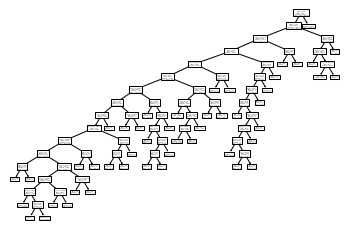

In [13]:
from sklearn import tree
tree.plot_tree(classifier)

In [14]:
from matplotlib import pyplot as plt

In [15]:
fig = plt.figure(figsize=(500,200))
tree.plot_tree(classifier, filled=True)
fig.savefig("tree.png")